# (1.) Perceptron Scikit-learn

In [ ]:
import numpy as np

X = [[0, 0],    # ค่า Feature
     [0, 1],
     [1, 0],
     [1, 1]]

X_train = np.array(X)   # เปลี่ยนเป็น Numpy Array

y_and = [0, 0, 0, 1]  # target กรณี AND Gate
y_or = [0, 1, 1, 1]    # OR Gate

**AND Gate**

In [ ]:
from sklearn.linear_model import Perceptron
y_train = np.array(y_and)   # เปลี่ยนเป็น Numpy Array

model = Perceptron(tol=1e-3, random_state=0, verbose=False) # สร้าง Neuron
model.fit(X_train, y_train)

print('Score:', model.score(X_train, y_train))    # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Score: 1.0
Predicted: [0 0 0 1]
Target: [0 0 0 1]


Score 100%, Output ที่ได้ตรงกับ Target

การใช้ Perceptron ใน Scikit-learn จะเรียนรู้และปรับค่า weight ไปเรื่อยๆ จนกว่าจะได้ output(y) ถูกต้อง

เมื่อ Neuron ปรับค่า weight จนได้ output ตรงกับ target แล้ว ถือว่ากระบวนการ Backpropagation สิ้นสุดลง(จบการ Train)

ลองตรวจดูค่า weight ดังนี้

In [ ]:
print('weight [w1 w2] =', model.coef_[0])
print('w0 (bias) =', model.intercept_[0])

weight [w1 w2] = [2. 2.]
w0 (bias) = -2.0


**OR Gate**

In [ ]:
from sklearn.linear_model import Perceptron
y_train = np.array(y_or)   # เปลี่ยนเป็น Numpy Array

model = Perceptron(tol=1e-3, random_state=0, verbose=False) # สร้าง Neuron
model.fit(X_train, y_train)

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Score: 1.0
Predicted: [0 1 1 1]
Target: [0 1 1 1]


Score 100%, Output ที่ได้ตรงกับ Target

In [ ]:
print('weight [w1 w2] =', model.coef_[0])
print('w0 (bias) =', model.intercept_[0])

weight [w1 w2] = [2. 2.]
w0 (bias) = -1.0


# (2.) ดูรอบการทำ Backpropagation

ลองเปลี่ยนพารามิเตอร์ verbose = True เป็นการเปิดให้แสดงสถานะข้อมูลต่างๆ ในขณะทำ Backpropagation

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron

X = [[0, 0],    # ค่า Feature
     [0, 1],
     [1, 0],
     [1, 1]]

X_train = np.array(X)   # เปลี่ยนเป็น Numpy Array
y_and = [0, 0, 0, 1]  # target กรณี AND Gate
y_train = np.array(y_and)   # เปลี่ยนเป็น Numpy Array

model = Perceptron(tol=1e-3, random_state=0, verbose=True) # สร้าง Neuron
model.fit(X_train, y_train)


-- Epoch 1
Norm: 0.00, NNZs: 0, Bias: -1.000000, T: 4, Avg. loss: 0.750000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.250000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 0, Bias: -2.000000, T: 12, Avg. loss: 0.250000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 16, Avg. loss: 0.500000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -2.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 2, Bias: -1.000000, T: 24, Avg. loss: 0.250000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -3.000000, T: 28, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.24, NNZs: 2, Bias: -2.000000, T: 32, Avg. loss: 0.500000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.41, NNZs: 2, Bias: -3.000000, T: 36, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- E

Perceptron(verbose=True)

- Epoch คือรอบที่ทำการปรับ weight เช่น ในโค้ดนี้ทำ 10 ครั้ง  ถึงจะได้ผลลัพธ์ที่ใกล้เคียงกับเป้าหมายหรือถูกต้องทุกเคส(เรียนรู้ได้ดีสุด แม้ไม่ถูก100%) โดยจำนวนรอบที่ใช้จริง อาจต่างกัน
- loss = Error = Target - Output, Avg.loss คือเอาค่า loss แต่ละเคส(มี 4 เคส: [0, 0, 0, 1])มาเฉลี่ยกัน
  
  จะเห็นว่า ค่าloss ในแต่ละ Epoch มีแนวโน้มลดลงให้ได้มากที่สุดเท่าที่จะทำได้
- ฺBias = w0 จะเห็นว่ามีการปรับเปลี่ยนค่าในแต่ละ Epoch
- Convergence คือ ปรับค่า weight ให้เข้าใกล้เป้าหมายได้ดีที่สุด(Output ใกล้เคียงกับ Target มากที่สุด)

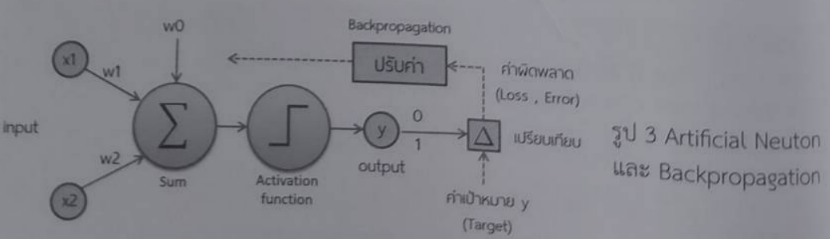

# (3.) XOR Perceptron

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron

X = [[0, 0],    # ค่า Feature
     [0, 1],
     [1, 0],
     [1, 1]]
X_train = np.array(X)   # เปลี่ยนเป็น Numpy Array

y = [0, 1, 1, 0]    # XOR Gate
y_train = np.array(y)

model = Perceptron(tol=1e-3, random_state=0, verbose=False) # สร้าง Neuron
model.fit(X_train, y_train)

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)


Score: 0.5
Predicted: [0 0 0 0]
Target: [0 1 1 0]


ได้ Score 50%(ถูกครึ่ง ผิดครึ่ง) ถือว่าใช้ไม่ได้ ลองกด run หลายๆครั้งก็ได้เหมือนเดิม

เพราะกรณี XOR ต้องใช้การตัดแบ่ง(Classify) ด้วยเส้นโค้งหรือเส้นตรงหลายเส้น

ทางแก้ คือ ใช้ Multi-layer Perceptron(MLP)



# (4.) XOR Gate ด้วย MLP

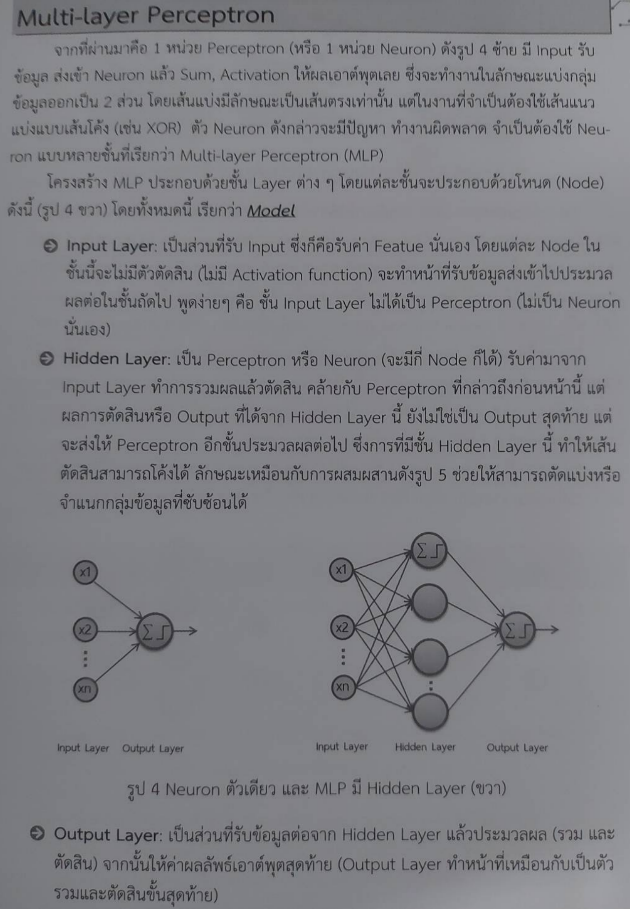
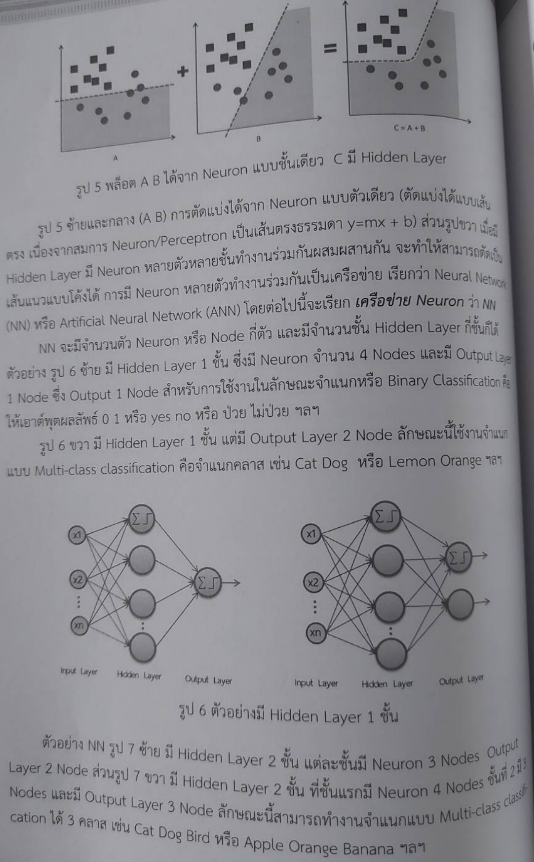
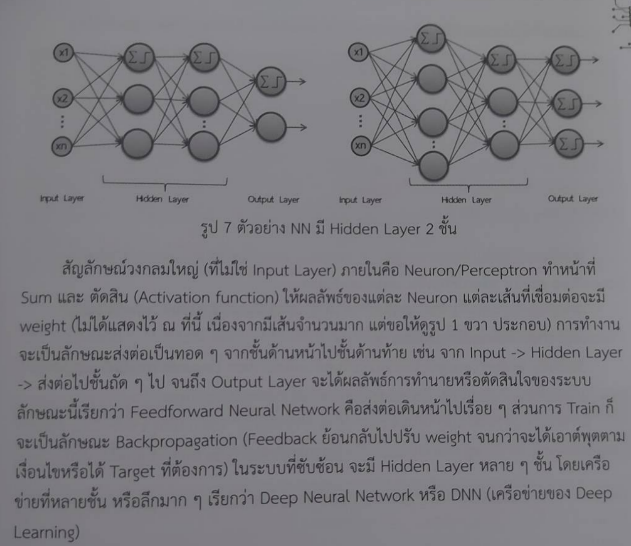

In [ ]:
import numpy as np

X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
X_train = np.array(X)    # เตรียม X สำหรับ Train เหมือน ML ทั่วไป

y = [0, 1, 1, 0]    # target XOR
y_train = np.array(y)

ตัวอย่างนี้มีการสร้าง NN ที่มี Hidden Layer จำนวน 3 Node(hidden_layer_sizes=(3))

ถ้าต้องการปิดสถานะแสดงข้อมูลการวนรอบขณะTrain(Iteration) ให้เปลี่ยนจาก verbose=True เป็น verbose=False

ค่า random_state=1 คือ กำหนดให้สุ่ม แต่จะได้ผลค่าสุ่มเดิมทุกครั้ง(ถ้าไม่กำหนด ค่าสุ่มจะเปลี่ยนไปเรื่อยๆ)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3), random_state=1, verbose=True) # สร้าง NN
model.fit(X_train, y_train) # Train

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Iteration 1, loss = 0.76215015
Iteration 2, loss = 0.76188369
Iteration 3, loss = 0.76161822
Iteration 4, loss = 0.76135378
Iteration 5, loss = 0.76109036
Iteration 6, loss = 0.76082798
Iteration 7, loss = 0.76056667
Iteration 8, loss = 0.76030643
Iteration 9, loss = 0.76004728
Iteration 10, loss = 0.75978922
Iteration 11, loss = 0.75953228
Iteration 12, loss = 0.75927645
Iteration 13, loss = 0.75902176
Iteration 14, loss = 0.75876821
Iteration 15, loss = 0.75851581
Iteration 16, loss = 0.75826457
Iteration 17, loss = 0.75801450
Iteration 18, loss = 0.75776559
Iteration 19, loss = 0.75751786
Iteration 20, loss = 0.75727132
Iteration 21, loss = 0.75702596
Iteration 22, loss = 0.75678178
Iteration 23, loss = 0.75653880
Iteration 24, loss = 0.75629701
Iteration 25, loss = 0.75605641
Iteration 26, loss = 0.75581701
Iteration 27, loss = 0.75557879
Iteration 28, loss = 0.75534177
Iteration 29, loss = 0.75510593
Iteration 30, loss = 0.75487128
Iteration 31, loss = 0.75463780
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


มีการ Train 200 รอบแล้วหยุด เมื่อดูค่า Loss ยังถือว่าสูงอยู่ และอีกอย่างคือ Score 50% ยังใช้ไม่ได้
บริเวณท้ายๆ มีการแจ้งเตือน Convergence... ซึ่งหมายความว่า ยังrunไม่ถึงจุดที่ Loss(Error) น้อยสุด(Optimization ยังไม่ถึง Convergence) ให้ปรับปรุงต่อ

ลองเพิ่มเป็น 4 Node ในชั้น Hidden Layer(hidden_layer_sizes=(4)) หลังรันจะพบว่าค่า Loss น้อยลงจากโค้ดก่อนหน้านี้ อีกทั้ง Score ยังมากขึ้น เริ่มใกล้เคียงกับความจริงมากขึ้น

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(4), random_state=1, verbose=True) # สร้าง NN
model.fit(X_train, y_train) # Train

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Iteration 1, loss = 0.66574364
Iteration 2, loss = 0.66549566
Iteration 3, loss = 0.66524810
Iteration 4, loss = 0.66500098
Iteration 5, loss = 0.66475429
Iteration 6, loss = 0.66450805
Iteration 7, loss = 0.66426224
Iteration 8, loss = 0.66401688
Iteration 9, loss = 0.66377195
Iteration 10, loss = 0.66352746
Iteration 11, loss = 0.66328338
Iteration 12, loss = 0.66303971
Iteration 13, loss = 0.66279645
Iteration 14, loss = 0.66252332
Iteration 15, loss = 0.66223623
Iteration 16, loss = 0.66193912
Iteration 17, loss = 0.66163513
Iteration 18, loss = 0.66132621
Iteration 19, loss = 0.66101367
Iteration 20, loss = 0.66069845
Iteration 21, loss = 0.66038127
Iteration 22, loss = 0.66006264
Iteration 23, loss = 0.65974300
Iteration 24, loss = 0.65942265
Iteration 25, loss = 0.65910188
Iteration 26, loss = 0.65878090
Iteration 27, loss = 0.65845989
Iteration 28, loss = 0.65813900
Iteration 29, loss = 0.65781835
Iteration 30, loss = 0.65749805
Iteration 31, loss = 0.65717821
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


สามารถตรวจสอบจำนวนการ Train เพื่อปรับปรุงค่า weight ได้

In [ ]:
model.max_iter

200

ลองเพิ่มจำนวนการ Train เพื่อปรับปรุงค่า weight โดยกำหนดจำนวนการ Train สูงสุด 600 รอบแล้ว run ใหม่

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(4), random_state=1, verbose=True,
                      max_iter=600) # สร้าง NN
model.fit(X_train, y_train) # Train

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Iteration 1, loss = 0.66574364
Iteration 2, loss = 0.66549566
Iteration 3, loss = 0.66524810
Iteration 4, loss = 0.66500098
Iteration 5, loss = 0.66475429
Iteration 6, loss = 0.66450805
Iteration 7, loss = 0.66426224
Iteration 8, loss = 0.66401688
Iteration 9, loss = 0.66377195
Iteration 10, loss = 0.66352746
Iteration 11, loss = 0.66328338
Iteration 12, loss = 0.66303971
Iteration 13, loss = 0.66279645
Iteration 14, loss = 0.66252332
Iteration 15, loss = 0.66223623
Iteration 16, loss = 0.66193912
Iteration 17, loss = 0.66163513
Iteration 18, loss = 0.66132621
Iteration 19, loss = 0.66101367
Iteration 20, loss = 0.66069845
Iteration 21, loss = 0.66038127
Iteration 22, loss = 0.66006264
Iteration 23, loss = 0.65974300
Iteration 24, loss = 0.65942265
Iteration 25, loss = 0.65910188
Iteration 26, loss = 0.65878090
Iteration 27, loss = 0.65845989
Iteration 28, loss = 0.65813900
Iteration 29, loss = 0.65781835
Iteration 30, loss = 0.65749805
Iteration 31, loss = 0.65717821
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


ค่า Loss น้อยลงกว่า โค้ดก่อนหน้านี้ แต่ยังมีข้อความแจ้งว่า ยังไม่ถึง Convergence ดังนั้น ลองเพิ่มจำนวนรอบอีกเป็น 900

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(4), random_state=1, verbose=True,
                      max_iter=900) # สร้าง NN
model.fit(X_train, y_train) # Train

print('Score:', model.score(X_train, y_train))     # ตรวจสอบ Score
print('Predicted:', model.predict(X_train))
print('Target:', y_train)

Iteration 1, loss = 0.66574364
Iteration 2, loss = 0.66549566
Iteration 3, loss = 0.66524810
Iteration 4, loss = 0.66500098
Iteration 5, loss = 0.66475429
Iteration 6, loss = 0.66450805
Iteration 7, loss = 0.66426224
Iteration 8, loss = 0.66401688
Iteration 9, loss = 0.66377195
Iteration 10, loss = 0.66352746
Iteration 11, loss = 0.66328338
Iteration 12, loss = 0.66303971
Iteration 13, loss = 0.66279645
Iteration 14, loss = 0.66252332
Iteration 15, loss = 0.66223623
Iteration 16, loss = 0.66193912
Iteration 17, loss = 0.66163513
Iteration 18, loss = 0.66132621
Iteration 19, loss = 0.66101367
Iteration 20, loss = 0.66069845
Iteration 21, loss = 0.66038127
Iteration 22, loss = 0.66006264
Iteration 23, loss = 0.65974300
Iteration 24, loss = 0.65942265
Iteration 25, loss = 0.65910188
Iteration 26, loss = 0.65878090
Iteration 27, loss = 0.65845989
Iteration 28, loss = 0.65813900
Iteration 29, loss = 0.65781835
Iteration 30, loss = 0.65749805
Iteration 31, loss = 0.65717821
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


ณ ขณะนี้ Score 100%(ถูกทุกเคส) ถือว่า weight เหมาะสม ใช้ได้แล้ว

ถ้าเพิ่มจำนวน Node(hidden_layer_sizes) หรือ เพิ่มจำนวนการ Train ให้มากกว่าโค้ดก่อนหน้านี้ ก็จะได้ค่า Loss น้อยกว่านี้(จำนวน Node มากทำให้ NN ทำงานละเอียดขึ้น, จำนวนการ Train มากทำให้ค่า weight มีความถูกต้องมากขึ้น แต่อาจเกิดปัญหา Overfitting ได้)

หลัง Train แล้ว สามารถนำไปใช้งานจริงได้เลย, ลองตรวจสอบดูโครงสร้าง และ weight แต่ละ Neuron ตามนี้

In [ ]:
[coef.shape for coef in model.coefs_]   # ดูโครงสร้าง (shape)

[(2, 4), (4, 1)]

- (2,4) คือ 2 Input, 1 hidden layer(Neuron 4 Node)
- (4,1) คือ Neuron 4 Node, Output 1 Node

In [ ]:
print(model.coefs_)

[array([[-2.59294024e-10,  1.15076115e+00, -3.07408277e-01,
        -8.68274657e-01],
       [-1.09158683e-01, -1.15088159e+00, -6.93327792e-02,
         5.61065103e-01]]), array([[-0.07869046],
       [ 1.78394645],
       [-0.3351625 ],
       [ 1.10638124]])]


- array แรก: w1 w2 ของ Hidden Layer จะเป็นคู่ๆ โดยชุดแรกมี 4 คู่(2 Input(x1, x2) 4 Node)
- array สอง: weight ของ Output Layer

In [ ]:
print(model.intercepts_)

[array([-2.06465052e-01, -3.00904340e-04, -1.61610971e-01,  3.07243912e-01]), array([-0.81267055])]


- array แรก: ค่า bias(w0) ของ Hidden Laer
- array สอง: ค่า bias(w0) ของ Output Laer

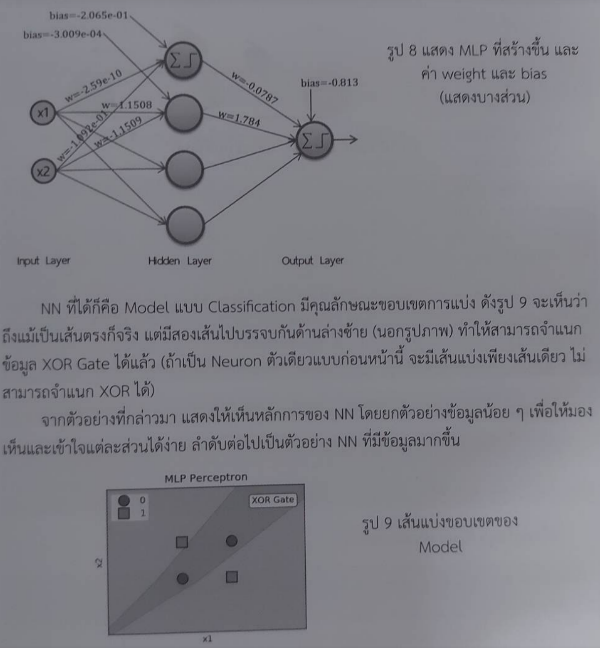

# (5.) MLP จำแนกผลไม้ 2 คลาส

สร้าง NN แบบ Binary classification จำแนกผลไม้ 2 ชนิด โดยมีข้อมูล Feature ดังนี้
- m(mass) คือ มวลเป็นกรัม
- d(diameter) คือ ขนาดเส้นผ่านศูนย์กลาง(ข้อมูลสมมุติเพื่อประกอบการทดลอง)

target มี 2 ค่า: 0 คือ Grape(องุ่น) และ 1 คือ Lemon(มะนาว)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

f2c = pd.DataFrame({'m' : pd.Series([6.6, 7.0, 8.2, 6.5, 8.9, 6.9, 6.1, 6.0, 5.7, 7.5, 7.4, 9.0, 8.7, 8.0, 8.0]),
                    'd' : pd.Series([3.2, 4.8, 4.4, 5.5, 5.2, 5.9, 5.0, 4.2, 3.6, 3.8, 5.1, 4.0, 3.5, 3.1, 6.0]),
                    'target' : pd.Series([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])})
f2c

,m,d,target
0,6.6,3.2,0
1,7.0,4.8,1
2,8.2,4.4,1
3,6.5,5.5,0
4,8.9,5.2,0
5,6.9,5.9,0
6,6.1,5.0,0
7,6.0,4.2,0
8,5.7,3.6,0
9,7.5,3.8,1


ดูว่ามี target อะไรบ้าง ซึ่งจะเห็นว่ามี 2 class คือ 0 และ 1

In [ ]:
f2c.target.unique()

array([0, 1])

Data Visualization

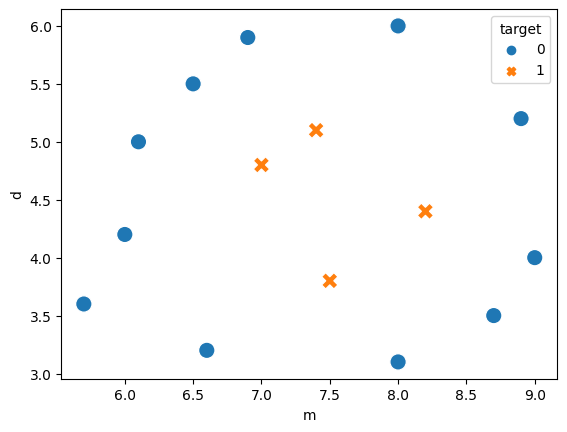

In [ ]:
sns.scatterplot(x='m',y='d',data=f2c,hue='target',style='target',s=140)
plt.show()

จะเห็นว่า ผลไม้หมายเลข 0(องุ่น) จะอยู่ตรงกลาง, ผลไม้หมายเลข 1(มะนาว) จะอยู่รอบนอก

เตรียมข้อมูล X, y

In [ ]:
X = f2c.drop('target', axis=1)
y = f2c.target

ปรับสเกลของ Feature แต่ละตัวให้มีความเสมอภาคกัน คือ ให้เป็นค่า Standard Scale(วิธีนี้ใช้กับข้อมูลที่มีการกระจายในลักษณะ Normal แม้ว่าข้อมูล f2c นั้นอาจไม่ใช่ Normal)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X)   # X สำหรับ Train
y_train = y   # y สำหรับ Train

f2c_sc = pd.DataFrame(X_train, columns=['d','m'])
f2c_sc['target'] = y_train
f2c_sc.head()

,d,m,target
0,-0.736514,-1.398477,0
1,-0.352246,0.340562,1
2,0.800559,-0.094198,1
3,-0.832581,1.101391,0
4,1.473028,0.775322,0


หลังจากเปลี่ยน จะเห็นว่าข้อมูลมีค่าน้อยลง

## Case 1: ใช้ค่า Default

In [ ]:
from sklearn.neural_network import MLPClassifier

# hidden = 100 (Default)
model = MLPClassifier(random_state=1)   # กำหนดค่าสุ่มให้ได้ค่าเหมือนเดิมตลอด
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 0.7333
actual: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


มีข้อความแจ้งเตือนว่า ยังไม่Convergence, ความแม่นยำ 0.7333


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
print('Score:', model.score(X_train, y_train).round(4))
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

Score: 0.7333
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.00      0.00      0.00         4

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15

[[11  0]
 [ 4  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


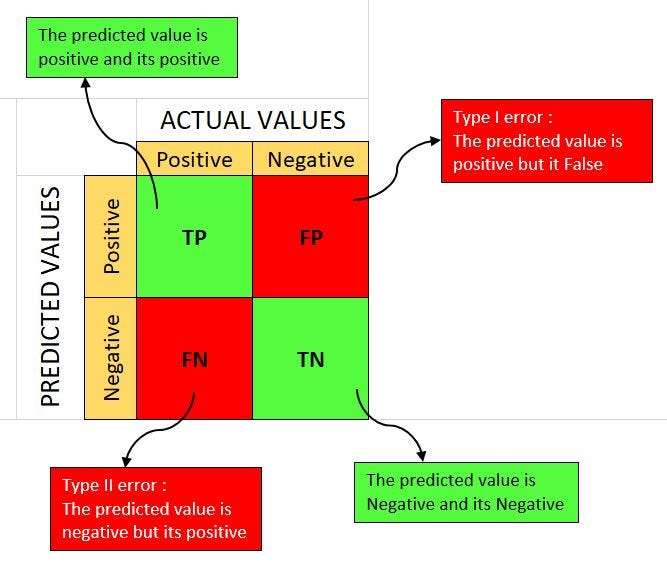

- classification_report: สังเกตที่แถว'1' คอลัมน์precision, recall จะเห็นว่าเป็นค่า 0 ทั้งหมด หมายความว่า ผลไม้หมายเลข 1(มะนาว) ทำนายผิดหมดเลย
  ส่วนคอลัมน์Support จะบอกว่าแต่ละแถว('0'(Positive),'1'(Negative)) มีอยู่ทั้งหมดกี่เคส จะเห็นว่าตั้งแต่แถว'accuracy'ลงไป คือ มี 15 เคส
- confusion_matrix: มี False Negative(FN) 4 เคส, True Positive 11 เคส

ลอง plot ดูขอบเขตการจำแนก model (ใช้ mlextend)

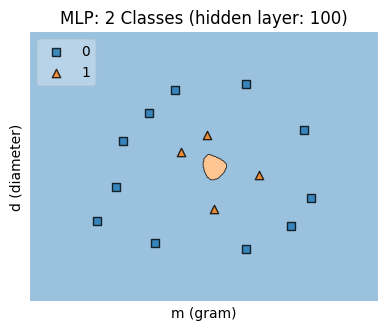

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format((model.hidden_layer_sizes)[0]))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

พื้นที่วงตรงกลาง Model ที่จำแนกว่าผลลัพธ์มีค่าเป็น 1(Lemon) แต่จากข้อมูลขณะนี้ แสดงว่า Model จำแนกได้ผิดหมด

คือ Predict ว่าเป็น 0(Grape) หมด ไม่มี 1(Lemon) เลย

ลองตรวจสอบโครงสร้าง Model ตามโค้ดข้างล่างนี้

In [ ]:
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 1)]

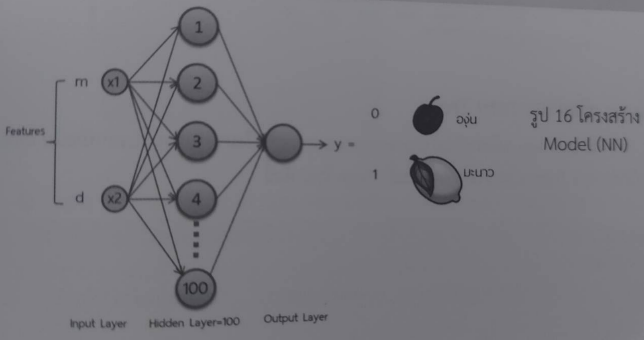

- Input Layer มี 2 nodes รับค่า Feature 2 ค่า(คือ w และ d)
- Hidden Layer มี 1 ชั้น จำนวน 100 Node โดยในรูปที่เอามา ไม่ได้แสดงเส้น w0 หรือ bias ไว้ ละไว้ในฐานที่เข้าใจ
- Output Layer มี 1 Node

plot เส้นกราฟแสดงค่า Loss(Loss Curve)

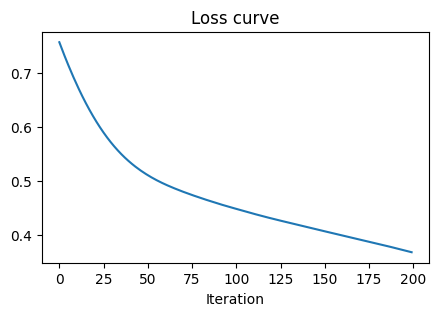

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.show()

Loss Curve คือแนวโน้มของค่า Loss ในการ Train แต่ละรอบ จากกราฟที่เห็น จะเห็นว่า Loss ลดลงเรื่อยๆ และมาหยุดที่ 200 รอบ ซึ่งถ้าดูจากแนวโน้ม หากรันต่อ Loss ก็น่าจะลดลงอีก แต่ ณ ขณะนี้ จำนวนการ Train คือ 200 รอบตามค่า Default

## Case 2: เพิ่มจำนวนรอบ Train

จากการ warning แจ้งว่ายังไม่ Convergence สาเหตุหนึ่งมาจากจำนวนรอบน้อยไป ลองเพิ่มจำนวนรอบการ Train เป็น 2000 จากนั้นสั่ง Train ใหม่ ดังนี้

In [ ]:
from sklearn.neural_network import MLPClassifier

# hidden = 100 (Default)
iter = 2000
model = MLPClassifier(max_iter=iter, random_state=1)   # กำหนดจำนวนรอบ
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 1.0
actual: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
predicted: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]


ครั้งนี้ได้ Score 1.0(ถูก 100%)

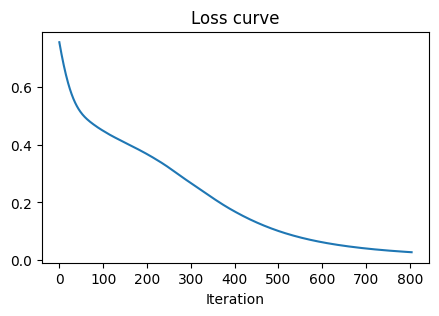

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.show()

- ในการ Train แต่ละรอบ ค่า Loss จะลดลงเรื่อยๆโดยช่วงแรก(ประมาณ 40 รอบแรก) Loss จะลดเร็วมาก สังเกตที่เส้นดิ่งลงเร็ว จากนั้น Loss จะลดลงแบบช้าๆ
- การ Train ไปหยุดที่ประมาณ 800 รอบ แสดงว่าจำนวนที่ตั้งไว้ 2000 แต่รันจริงไปไม่ถึง เพราะว่าการประมวลผลพบว่าได้ loss น้อยที่สุดเพียงแค่นี้ก็เลยหยุด นั้นคือเข้าสู่ Convergence แล้ว (สรุป การ train รวมประมาณ 800 แล้วหยุดอัตโนมัติ)

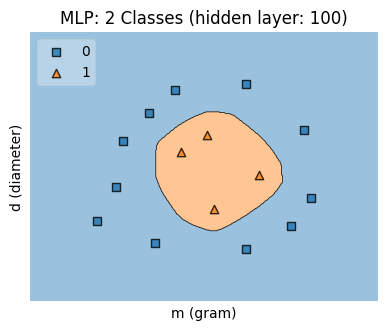

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format((model.hidden_layer_sizes)[0]))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

ใช้ไลบารี mlextend เหมือนกับ Case ที่ผ่านมา จะเห็นว่า Model แบ่งขอบเขตรอบจุดข้อมูล3เหลี่ยม(ผลไม้ชนิด0, องุ่น)ได้อย่างถูกต้อง

สรุป Hidden Layer จำนวน 100 Node และ จำนวนการ Train 800 รอบ *ใช้ได้*

## Case 3: ปรับจำนวน Hidden Layer

ทดลองเพิ่มจำนวน Node Hidden Layer เป็น 150(default 100) แต่ใช้จำนวนรอบในการ Train เป็น 200(default) เหมือน Case 1

In [ ]:
from sklearn.neural_network import MLPClassifier

hiddo = 150
iter = 200
model = MLPClassifier(hidden_layer_sizes=(hiddo), max_iter=iter, random_state=1)
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 0.8667
actual: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
predicted: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ได้ Score 0.8667 มีผิดอยู่ 2 จุด

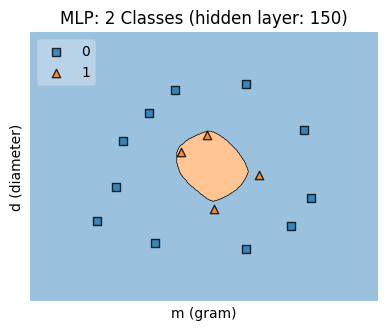

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hiddo))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

จะเห็นว่าขอบเขต Model ไม่คลอบคลุมข้อมูล 2 จุด (พลาดไป 2 จุด)

สรุปได้ว่า Hidden Layer 150 และ Train จำนวน 200 รอบ ยังใช้ไม่ได้

In [ ]:
[coef.shape for coef in model.coefs_]

[(2, 150), (150, 1)]

Input Layer มี 2 Nodes, Hidden Layer มี 150 Nodes, Output Layer มี 1 Nodes

## Case 4: ลดจำนวน Hidden Layer เพิ่มจำนวนรอบ

ลดจำนวน Node Hidden Layer ให้เหลือแค่ 4, แต่กำหนดจำนวนรอบการ Train ให้เป็น 2000

In [ ]:
from sklearn.neural_network import MLPClassifier

hiddo = 4
iter = 2000
model = MLPClassifier(hidden_layer_sizes=(hiddo), max_iter=iter, random_state=1)
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 1.0
actual: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
predicted: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


ถูก 100 %

In [ ]:
[coef.shape for coef in model.coefs_]

[(2, 4), (4, 1)]

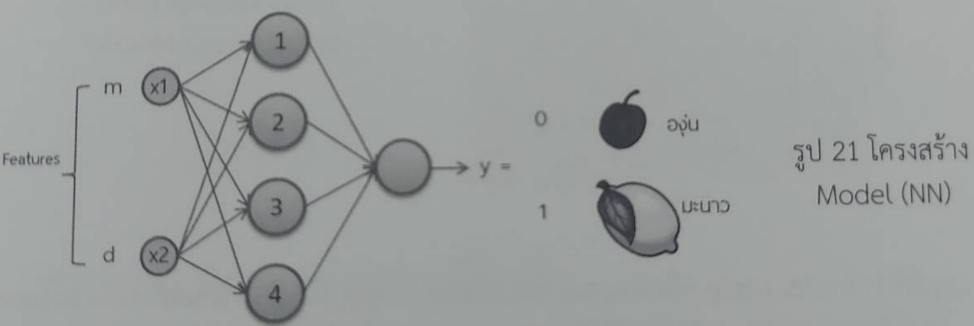

Hidden Layer มี 4 Node(ไม่แสดงเส้น w0 หรือ biasไว้ โดยละไว้ในฐานที่เข้าใจ)

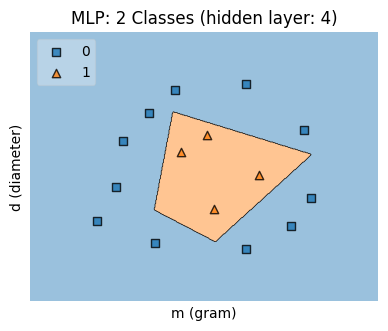

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hiddo))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

จะเห็นว่า Model มีขอบเจตจุดข้อมูลถูกต้องทั้งหมด ซึ่งเส้นขอบเขตมีลักษณะเป็นเหลี่ยมๆอย่างเห็นได้ชัด เนื่องจากจำนวน Node ชั้น Hidden Layer มีเพียง 4 Node เท่านั้น (Node ละเส้นตรง รวม 4 Node ก็จะได้ 4 เส้นหรือขอบเขต 4 เหลี่ยม)

สรุปคือ Hidden Layer มี 4 Node และ Train จำนวน 2000 ใช้ได้ (ถ้าใช้ Hidden Layer แค่ 3 Node ขอบเขต Model จะมีลักษณะเป็น 3 เหลี่ยม ซึ่งไม่คลอบคลุมข้อมูลตรงกลางได้ทั้งหมด แม้ว่าจะเพิ่มจำนวนรอบการ Train มากเท่าใดก็ตาม)

## Case 5: ปรับจำนวน Hidden Layer เป็น 10

ลดจำนวน Node Hidden Layer ให้เหลือแค่ 10, จำนวนรอบการ Train เป็น 2000 ก็จะพบว่าพื้นที่ขอบเขตมีประมาณ 10 เหลี่ยม แบ่งกลุ่มข้อมูลได้ถูกต้อง เมื่อเทียบกับ Case 4 ความเป็นเหลี่ยมๆน้อยลง

In [ ]:
from sklearn.neural_network import MLPClassifier

hiddo = 10
iter = 2000
model = MLPClassifier(hidden_layer_sizes=(hiddo), max_iter=iter, random_state=1)
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 1.0
actual: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]
predicted: [0 1 1 0 0 0 0 0 0 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
[coef.shape for coef in model.coefs_]

[(2, 10), (10, 1)]

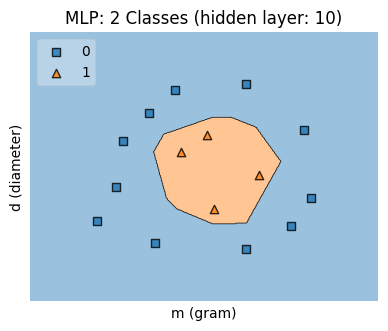

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 2 Classes (hidden layer: {})'.format(hiddo))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

สรุปได้ว่า จำนวน Node(ชั้น) ใน Hidden Layer เป็นตัวกำหนดลักษณะขอบเขตการจำแนก(Region) ของ Model

ทำนองว่า 4 Node ได้พื้นที่แบบ 4 เหลี่ยม, 10 Node ได้พื้นที่แบบ 10 เหลี่ยม

ถ้าต้องการให้ขอบโค้งเนียนมากขึ้น ก็กำหนดจำนวน Node ให้มากขึ้น เพื่อให้ Neuron ผสานการทำงานตีหลายๆเส้นนั่นเอง

แต่การกำหนดจำนวน Node มากเกินความจำเป็น จะทำให้การประมวลผลช้าลง

การกำหนดจำนวน Node น้อยเกินไป ถึงแม้จำนวนรอบการ Train จะมากๆ ก็อาจจะไม่สามารถทำให้ Model มีประสิทธิภาพสูงสุดได้ เพราะข้อจำกัดของขอบเขตพื้นที่ในการแบ่งนั่นเอง

จากตัวอย่างนี้ แสดงการจำแนกในลักษณะ Binary classification เท่านั้น คือ 0 1 (Yes No) ซึ่งจะกำหนดให้ 0 หรือ 1 มีค่าเป็นอะไรก็แล้วแต่การออกแบบ

# (6.) MLP จำแนกผลไม้ 3 คลาส

สร้าง NN แบบ Multi-class classification จำแนกผลไม้ 3 ชนิด โดยมีข้อมูล Feature ดังนี้
- m(mass) คือ มวลเป็นกรัม
- d(diameter) คือ ขนาดเส้นผ่านศูนย์กลาง(ข้อมูลสมมุติเพื่อประกอบการทดลอง)

target มี 3 ค่า: 0 คือ Grape(องุ่น), 1 คือ Lemon(มะนาว), 2 คือ Orange(ส้ม)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

f3c = pd.DataFrame({'m' : pd.Series([6.6, 7.0, 8.2, 6.5, 8.9, 6.9, 6.1, 6.0, 5.7, 7.5, 7.4, 9.0, 8.7, 8.0, 8.0]),
                    'd' : pd.Series([3.2, 4.8, 4.4, 5.5, 5.2, 5.9, 5.0, 4.2, 3.6, 3.8, 5.1, 4.0, 3.5, 3.1, 6.0]),
                    'target' : pd.Series([0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2])})
f3c

,m,d,target
0,6.6,3.2,0
1,7.0,4.8,1
2,8.2,4.4,1
3,6.5,5.5,0
4,8.9,5.2,2
5,6.9,5.9,0
6,6.1,5.0,0
7,6.0,4.2,0
8,5.7,3.6,0
9,7.5,3.8,1


ตรวจสอบ Target พบว่ามี 3 คลาส

In [ ]:
f3c.target.unique()

array([0, 1, 2])

Data Visualization

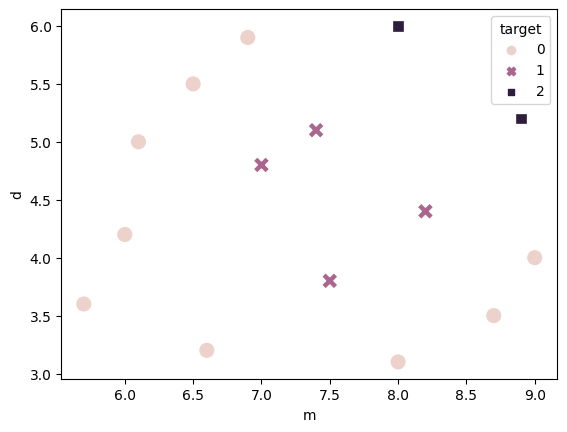

In [ ]:
sns.scatterplot(x='m',y='d',data=f3c,hue='target',style='target',s=140)
plt.show()

เตรียมข้อมูล และปรับค่าเป็น Standard scale

In [ ]:
from sklearn.preprocessing import StandardScaler
X = f3c.drop('target', axis=1)
y = f3c.target
sc = StandardScaler()

X_train = sc.fit_transform(X)   # X สำหรับ Train
y_train = y   # y สำหรับ Train

f3c_sc = pd.DataFrame(X_train, columns=['d','m'])
f3c_sc['target'] = y_train
f3c_sc.head()

,d,m,target
0,-0.736514,-1.398477,0
1,-0.352246,0.340562,1
2,0.800559,-0.094198,1
3,-0.832581,1.101391,0
4,1.473028,0.775322,2


## Case 1: ใช้ค่า Default

In [ ]:
from sklearn.neural_network import MLPClassifier

model_1 = MLPClassifier(random_state=1)   # กำหนดค่าสุ่มให้ได้ค่าเหมือนเดิมตลอด
model_1.fit(X_train, y_train)   # train

print('score:', model_1.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model_1.predict(X_train))

score: 1.0
actual: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]
predicted: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score 1.0 คือถูกหมด แต่ยังมีแจ้งเตือนว่ายังไม่ Convergence

In [ ]:
hiddo = (model_1.hidden_layer_sizes)[0]
iter = model_1.max_iter
print(hiddo)
print(iter)

100
200


ใช้ค่า default คือ มี hidden layer = 100 node, iter = 200

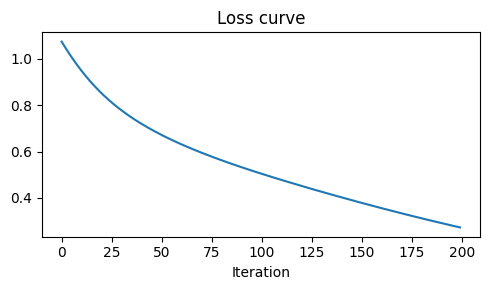

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model_1.loss_curve_)
plt.tight_layout()
plt.show()

สังเกตว่า curve มีแนวโน้มลดลงไปได้อีก ลักษณะนี้ควรเพิ่มค่า max_iter

In [ ]:
[coef.shape for coef in model_1.coefs_]

[(2, 100), (100, 3)]

ดูโครงสร้างของ Model จะเห็นค่า 3 คือ Output Layer มีจำนวน 3 Node(3 Neuron) โดยแต่ละ Node จะให้ output 0 หรือ 1

การที่ output สื่อว่าเป็นผลไม้ชนิดใด(คลาสใด) ก็จะ Output ในลักษณะ Binary เช่น 100=Grape, 010=Lemon, 001=Orange

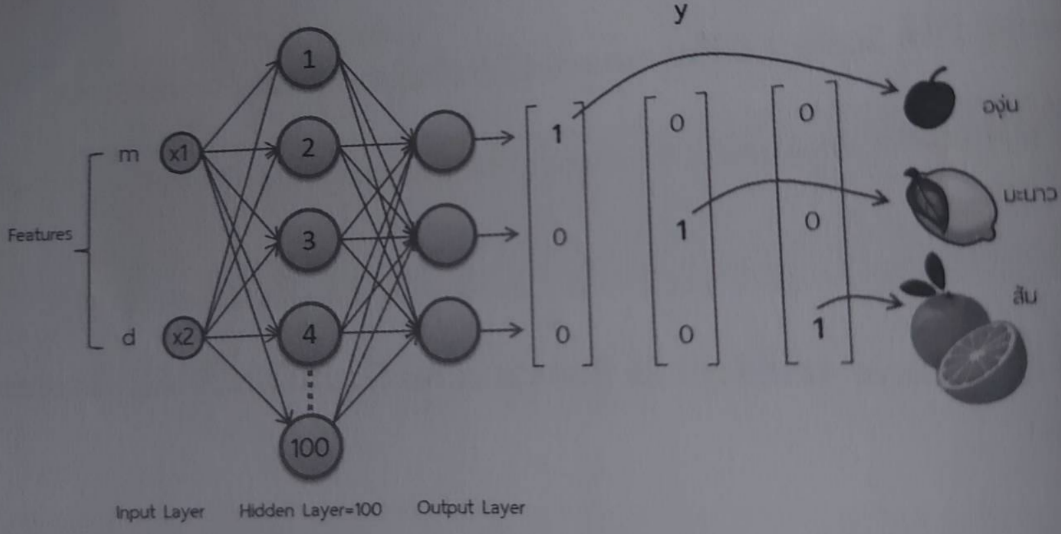

plot ดูขอบเขตการจำแนกของ Model จะเห็นว่าขอบเขตแบ่งจำแนกรอบจุดข้อมูลได้ถูกต้องทั้งหมด แต่ก็เกือบหลุดไป 1 จุด คือ จุด3เหลี่ยมล่าง

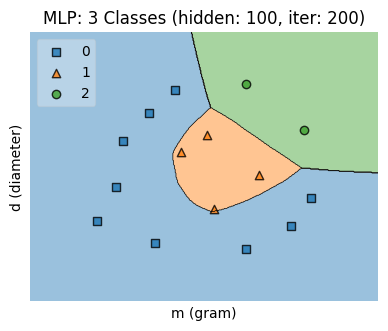

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model_1, legend=2)

plt.title('MLP: 3 Classes (hidden: {}, iter: {})'.format(hiddo, iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

## Case 2: ลดจำนวน Hidden Layer, เพิ่มจำนวนรอบ

กำหนดจำนวน Node Hidden Layer 4, จำนวนรอบ Train 2500

In [ ]:
from sklearn.neural_network import MLPClassifier

hiddo = 4
iter = 2500
model = MLPClassifier(hidden_layer_sizes=hiddo, max_iter=iter, random_state=1)
model.fit(X_train, y_train)   # train

print('score:', model.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model.predict(X_train))

score: 1.0
actual: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]
predicted: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]


ไม่มีแจ้งเตือนว่ายังไม่ถึง Convergence แล้ว

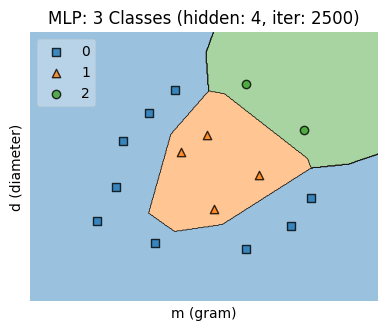

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2)

plt.title('MLP: 3 Classes (hidden: {}, iter: {})'.format(hiddo, iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

plot ดูขอบเขตการจำแนกของ Model จะเห็นว่าได้ขอบเขตถูกต้องและดูดีขึ้น สามารถโอบรอบจุดข้อมูลและมีระยะเผื่อเพิ่มขึ้น แต่รูปร่างยังเป็นเหลี่ยมๆอยู่

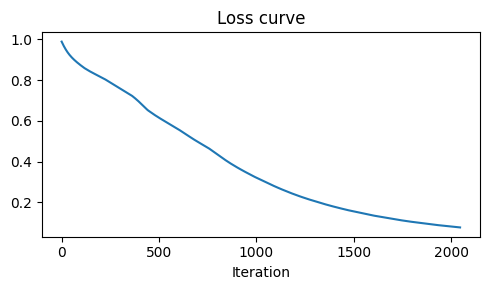

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

จาก Loss curve ที่เห็น หาก Train ต่อ Loss ก็น่าจะลดลง แต่ ณ ขณะนี้ผล Score ได้ถูกต้องดีแล้ว การไม่จำเป็นต้องเพิ่มรอบการ Train

## Case 3: ปรับจำนวน Hidden Layer

 จำนวน Node Hidden Layer 30, จำนวนรอบการ Train 2500          ทำแบบนี้เพื่อให้ขอบเขตของ Model โค้งเนียนมากขึ้น

In [ ]:
from sklearn.neural_network import MLPClassifier

hiddo = 30
iter = 2500
model_3 = MLPClassifier(hidden_layer_sizes=hiddo, max_iter=iter, random_state=1)
model_3.fit(X_train, y_train)   # train

print('score:', model_3.score(X_train, y_train).round(4))
print('actual:', np.array(y))
print('predicted:', model_3.predict(X_train))

score: 1.0
actual: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]
predicted: [0 1 1 0 2 0 0 0 0 1 1 0 0 0 2]


ไม่มีแจ้งเตือนว่ายังไม่ถึง Convergence แล้ว

In [ ]:
[coef.shape for coef in model_3.coefs_]

[(2, 30), (30, 3)]

Hidden Layer มี 30 node

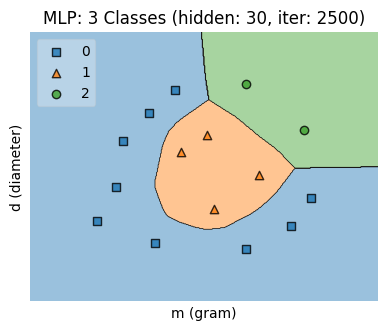

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model_3, legend=2)

plt.title('MLP: 3 Classes (hidden: {}, iter: {})'.format(hiddo, iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

plot ดูขอบเขต(Boundary) การจำแนกของ Model ได้ขอบเขตถูกต้อง โอบรอบจุดข้อมูลและมีระยะเผื่อเพิ่มขึ้น รูปร่างดีกว่า Case2

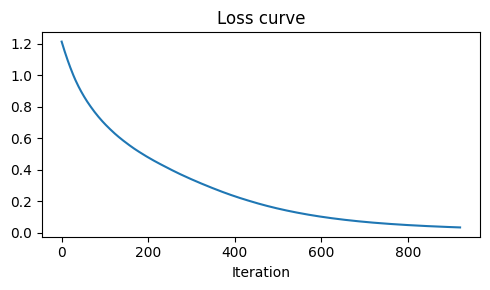

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model_3.loss_curve_)
plt.tight_layout()
plt.show()

จาก Loss Curve จะเห็นว่า Loss ลดลงและเกือบคงที่ประมาณที่ 900 รอบ(Convergence ประมาณรอบที่ 900) ลักษณะนี้ถือว่าเรียนรู้ได้รวดเร็วกว่า Case 2

## การใช้งาน Predict ทำนาย

การใช้ Model Predict ทำนาย สมมติว่ามีผลไม้ใหญ่ 2 ผลใหม่ ต้องการpredict ว่าเป้นผลไม้ชนิดใด

In [ ]:
#X_new = [8.4, 5]  # กรณี Predict ข้อมูล 1 รายการ
X_new = [[8.4, 5.2],    # ผลที่1 (m,d)
         [6.8, 4.2]]    # ผลที่2 (m,d)
X_new

[[8.4, 5.2], [6.8, 4.2]]

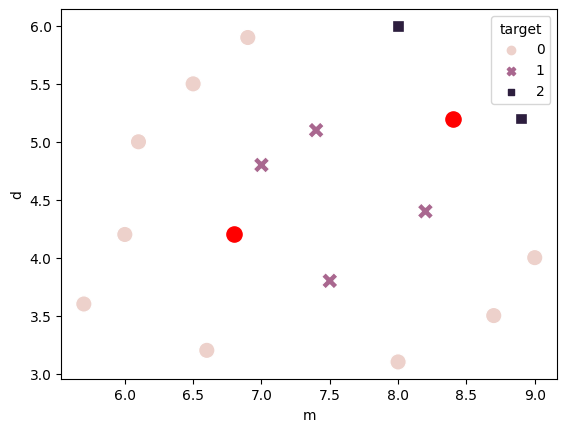

In [ ]:
sns.scatterplot(x='m',y='d',data=f3c,hue='target',style='target',s=140)
plt.scatter(X_new[0][0], X_new[0][1], marker='o', s=120, c='r')
plt.scatter(X_new[1][0], X_new[1][1], marker='o', s=120, c='r')
plt.show()

ต้องทำการแปลงข้อมูลให้เป็นค่า Standard scale เนื่องจาก Model train ด้วยค่า Standard(Train แบบไหน ก็ต้องแปลข้อมูลให้เป็นระบบเดียวกัน)

**หมายเหตุ: โค้ดข้างล่างนี้ scale ได้ไม่ตรงงกับในหนังสือเลย  ลองดูกราฟscatter ก่อน Scale และหลัง Scale จะเห็นว่าแปลกๆที่จุดแดงซ้ายล่าง**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_new_sc = sc.fit_transform(X_new)
X_new_sc

array([[ 1.,  1.],
       [-1., -1.]])

เมื่อแปลงข้อมูลแล้วทำการ Predict โดยลองใช้ Model จาก Case 1 และ 3

In [ ]:
model_1.predict(X_new_sc)

array([2, 0])

In [ ]:
model_3.predict(X_new_sc)

array([2, 0])

plot ดูขอบเขต Model จาก Case 1 และ 3

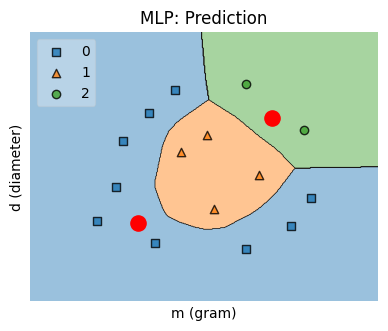

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model_3, legend=2)

plt.title('MLP: Prediction')
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

# plot จุดข้อมูลที่ให้ทำนาย (marker จุดวงกลม สีแดง)
plt.scatter(X_new_sc[:,0], X_new_sc[:,1], marker='o', s=120, c='r')
plt.show()

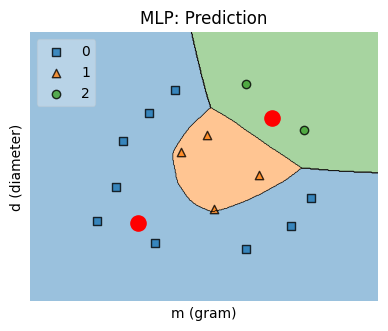

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model_1, legend=2)

plt.title('MLP: Prediction')
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

# plot จุดข้อมูลที่ให้ทำนาย (marker จุดวงกลม สีแดง)
plt.scatter(X_new_sc[:,0], X_new_sc[:,1], marker='o', s=120, c='r')
plt.show()

**ถ้าเป็นไปตามที่หนังสือบอก**
- case 1: ทำนายจุดล่างแดงซ้าย ว่าเป็นองุ่น
- case 3: ทำนายจุดล่างแดงซ้าย ว่าเป็นมะนาว

**ซึ่งไม่ตรงกับความเป็นจริง น่าจะมีปัญหาที่ sc**

```
X_new_sc = sc.fit_transform(X_new)
X_new_sc
```



# (7.) NN จำแนกดอก Iris

## load data

สร้าง Model ด้วย NN โดยใช้ข้อมูล Iris, ข้อมูล Feature ประกอบด้วยขนาดกลีบ 4 ค่า สิ่งสำคัญสำหรับ Model NN คือ
- การตรวจสอบข้อมูลสูญหาย(Missing Data)
- การเข้ารหัส Label Encoding เปลี่ยน Label ให้เป็นตัวเลข
- การปรับสเกลข้อมูล (Feature scaling)

เริ่มต้น import และตรวจสอบ data จะพบว่ามี target คือคอลัมน์ species

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


ตรวจสอบว่ามีข้อมูลสูญหาย(Missing) ที่เป็น NaN(Not a Number) หรือไม่? ถ้าเป็นอัลกอริทึมบางตัว ข้อมูลที่เป็น NaN จะไม่มีปัญหาต่อการประมวล แต่ถ้าเป็น NN จะมีปัญหาแน่ๆ

ต้องใช้ .isnull().sum() หาคอลัมน์ใดมีค่ามากกว่า 0 แสดงว่ามีการสูญหาย ต้องจัดการเสียก่อน เช่น ตัดทิ้ง หรือเติมค่าที่สูญหาย ฯลฯ

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

ไม่มีข้อมูลใดที่เป็น NaN(ไม่มี Mising Data)

อัลกอริทึมบางตัว สามารถใช้ค่าคลาสหรือ Target(y) ที่เป็นข้อความได้ แต่ NN จะต้องใช้ค่าที่เป็นตัวเลขเท่านั้น

In [6]:
pd.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

พบว่า Target(คอลัมน์ species) มี 3 คลาส(ดอกไม้ 3 ชนิด) เป็นชนิดข้อความ ให้ทำการเปลี่ยนหรือแทนที่ ข้อความ ให้เป็นตัวเลข(Encoding)แล้วให้เก็บไว้ที่ y

In [15]:
y, class_names = pd.factorize(df.species, sort=True)

print(class_names)    # เก็บค่า unique ของ target
print(y[40:120])      # ตรวจสอบข้อมูลบางส่วน
print(pd.unique(y))   # ตรวจสอบค่า y (Target)

Index(['setosa', 'versicolor', 'virginica'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
[0 1 2]


plot ดูข้อมูล

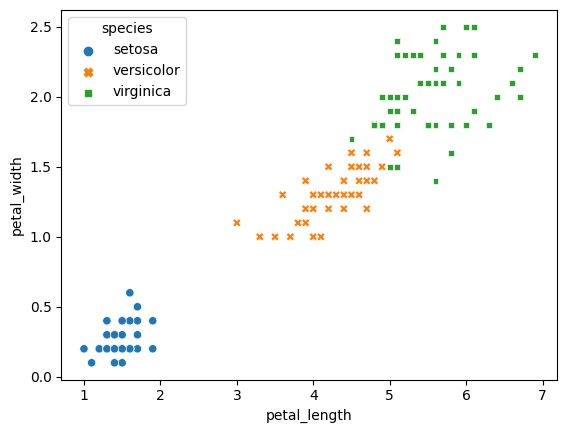

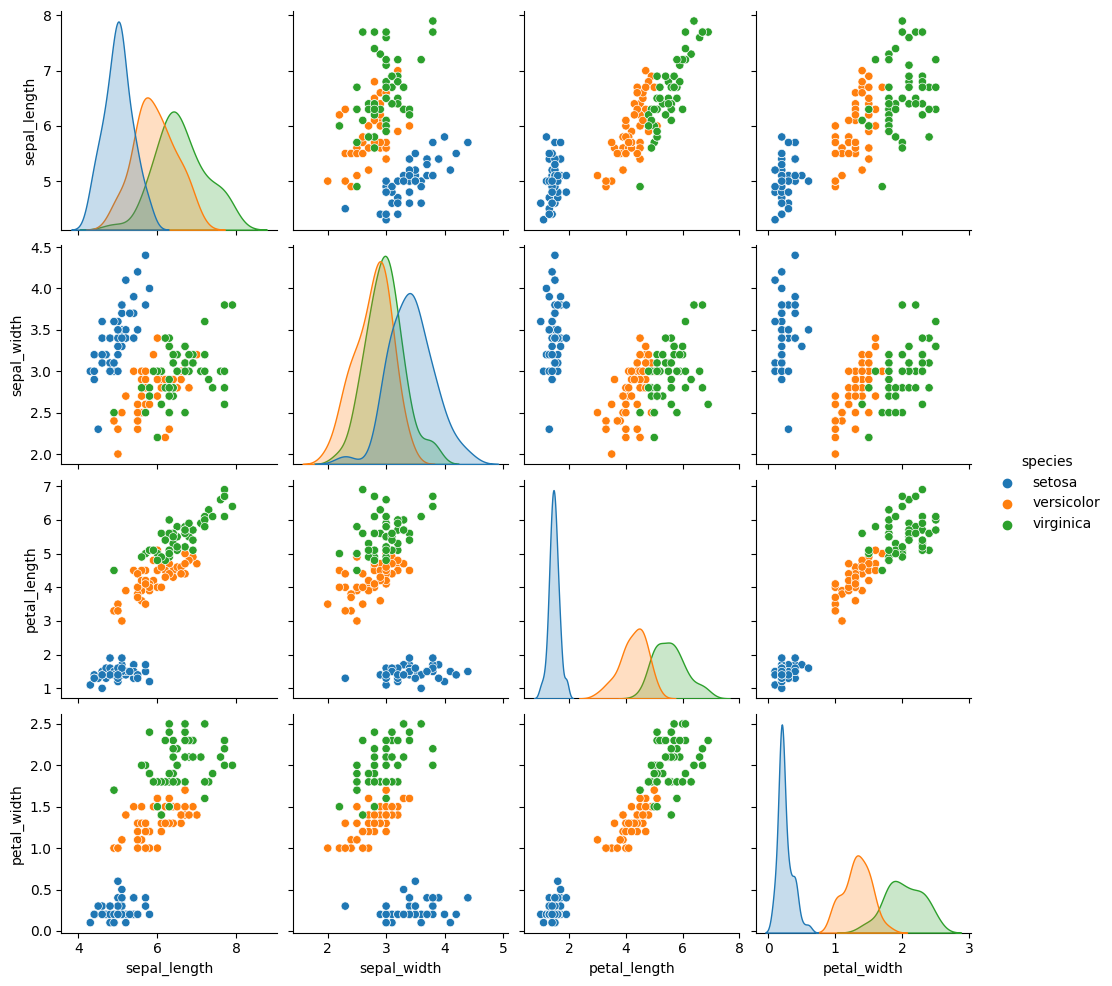

In [18]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species')
sns.pairplot(df, hue='species')
plt.show()

## เตรียมข้อมูล

เตรียมข้อมูลค่า X

In [20]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


เปลี่ยนค่าข้อมูลให้เป็น Standard scale

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

แบ่งข้อมูลเป็น Train 75% และ Test 25%

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) # Train-Test-Split
len(X_train), len(X_test) # ตรวจสอบขนาด Test, Train

(112, 38)

## Fit Model

กำหนด Hidden Layer มี 4 Nodes จำนวนการ Train 2000 รอบ

In [25]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(4), max_iter=2000, random_state=1)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=4, max_iter=2000, random_state=1)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_test)
print('Score:', model.score(X_test, y_test).round(4))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

Score: 0.9737
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


โครงสร้าง NN นี้ มี 4 Inputs, Hidden Layer 4 Nodes 3 Outputs

In [27]:
[coef.shape for coef in model.coefs_]

[(4, 4), (4, 3)]

## ใช้งาน Predict ทำนาย

แปลงข้อมูลใหม่ที่ทำนาย ให้เป็นสเกลเดียวกับ Train

In [31]:
#X_new = [[5.1, 3.5, 3.4, 1.4]]
X_new = [[6.1, 3.5, 3.9, 1.6]]

X_new_sc = sc.fit_transform(X_new)
X_new_sc

array([[0., 0., 0., 0.]])

นำข้อมูลที่แปลงแล้ว เข้า Model Predict ทำนายว่าเป็นดอกไม้สายพันธุ์ใด

In [39]:
# จาก class_names --> Index(['setosa', 'versicolor', 'virginica'], dtype='object')

y_pred = model.predict(X_new_sc)
print(class_names[y_pred][0]) # เอาค่าที่ทำนายมาเป็น index

versicolor


Visualize ดูขอบเขต Model และจุดข้อมูลใหม่ที่ทำการ Predict เนื่องจากตัวอย่างนี้มี Feature 4 ค่า ซึ่งการพล็อตด้วย mlxtend จะเป็นกราฟ 2 แกน x, y เท่านั้น ก็คือรับแค่ 2 Feature

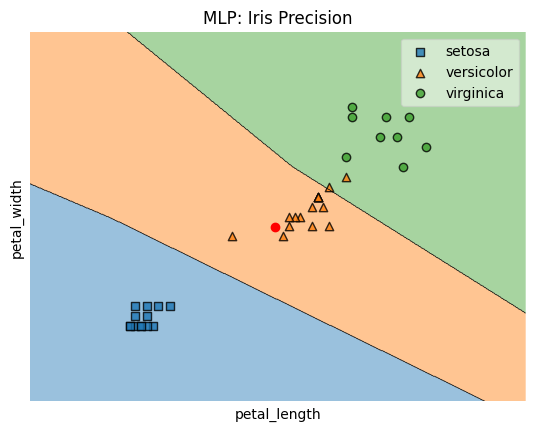

In [37]:
from mlxtend.plotting import plot_decision_regions
value = 0     # ช่วงของข้อมูล
width = 3.5   # ความกว้างของข้อมูล
ax = plot_decision_regions(X_test, np.array(y_test), clf=model,
                           feature_index = [2,3],   # ใช้ค่า Feature คอลัมน์2,3(petal)
                           filler_feature_values={0: value, 1: value},
                           filler_feature_ranges={0: width, 1: width},
                           legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha = 0.5)

plt.title('MLP: Iris Precision')
plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_new_sc[:,2], X_new_sc[:,3], marker='o', c='r')
plt.show()

จุดวงกลมสีแดงที่เห็น คือข้อมูลใหม่ที่ทำการ Predict, ผลลัพธ์ Model แจ้งว่าเป็น versicolor

# (8.) ปัญหาข้อมูล NaN

จำลองว่า มี NaN อยู่ใน dataset

In [40]:
df.loc[0,'sepal_length'] = None
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,150.000000,150.000000,150.000000
mean,5.848322,3.057333,3.758000,1.199333
std,0.828594,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


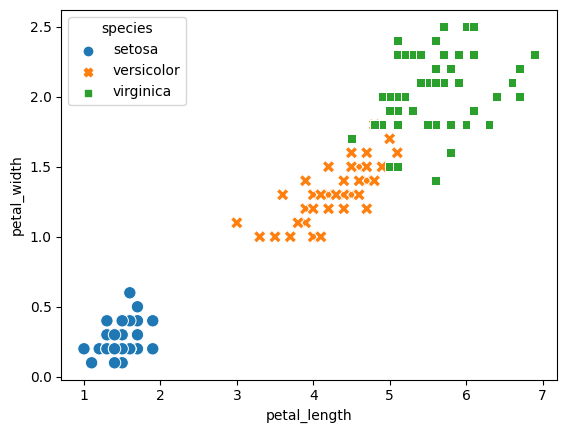

In [41]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', s=80)
plt.show()

In [43]:
df.isnull().sum()

sepal_length    1
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

ที่คอลัมน์ sepal_length มีข้อมูลสูญหาย 1 Sample ซึ่งตอนนี้ยังไม่มี error ใดๆ

ลองทำเหมือนเดิมโดยไม่สน Missing Data

In [44]:
y, class_names = pd.factorize(df.species, sort=True)

print(class_names)    # เก็บค่า unique ของ target
print(y[40:120])      # ตรวจสอบข้อมูลบางส่วน
print(pd.unique(y))   # ตรวจสอบค่า y (Target)

Index(['setosa', 'versicolor', 'virginica'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
[0 1 2]


In [45]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


ปรับสเกลข้อมูลด้วย Scaler

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[        nan,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.1483555 , -0.13197948, -1.34022653, -1.3154443 ],
       [-1.3905423 ,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.51163569,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02726211,  1.24920112, -1.34022653, -1.3154443 ]])

แบ่ง Train และ Test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) # Train-Test-Split
len(X_train), len(X_test) # ตรวจสอบขนาด Test, Train

(112, 38)

ทำการ Train

In [49]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(4), max_iter=2000, random_state=1)
# model.fit(X_train, y_train)

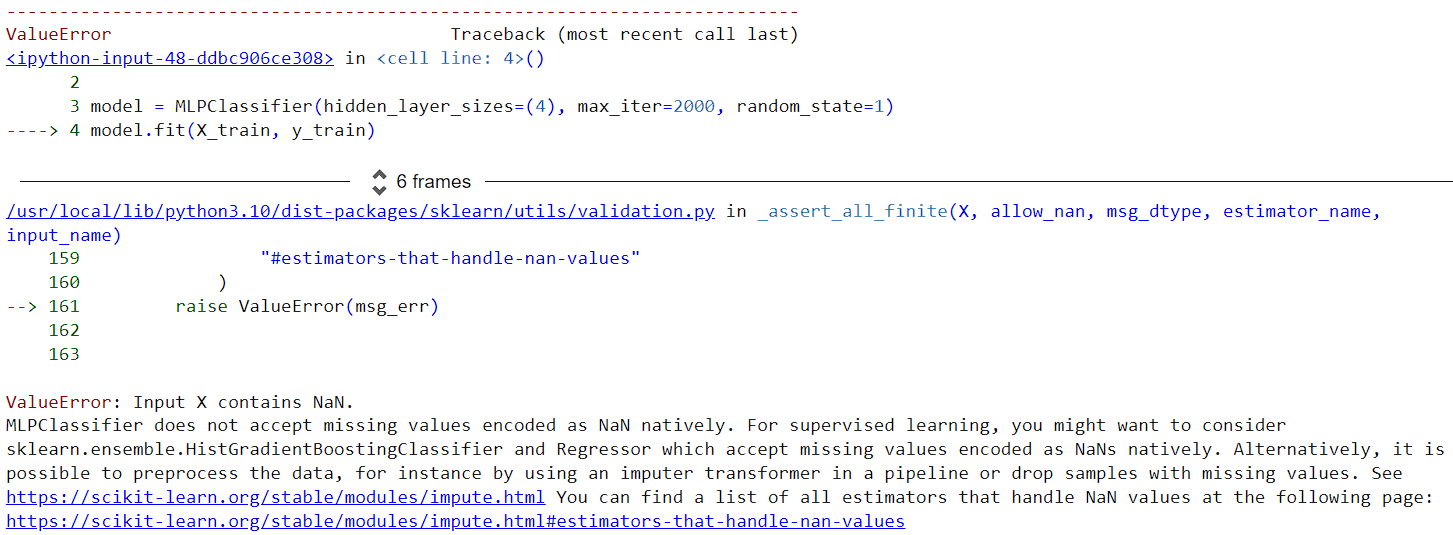

จะมีปัญหา Error หยุดทันที สาเหตุจากมี Missing Data(NaN) ดังนั้น NN ถือเป็นเรื่องสำคัญมาก ถ้ามี Missing Data จะต้องจัดการกับ Missing Data เสียก่อน เช่น ลบแถวทิ้ง แทนที่ด้วยค่าเฉลี่ย หรือ กรรมวิธีอื่นๆ(ไม่ให้ให้มี NaN)